In [83]:
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
from plotly.offline import iplot

In [86]:
df = pd.read_csv('Superstore.csv', encoding='latin1')
df.info()
print(df.columns)   
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [87]:
#Monthly Sales Trend

In [88]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


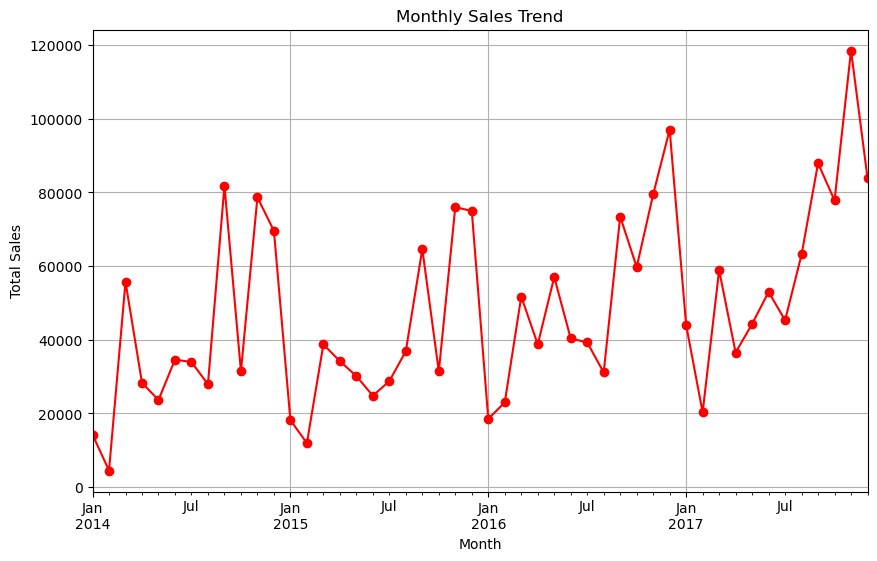

In [90]:
df['Months'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Months')['Sales'].sum()

plt.figure(figsize=(10,6))
monthly_sales.plot(kind='line', color = 'red', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

In [91]:
#Top 5 Products

In [92]:
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(5)
print(top_products) 

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


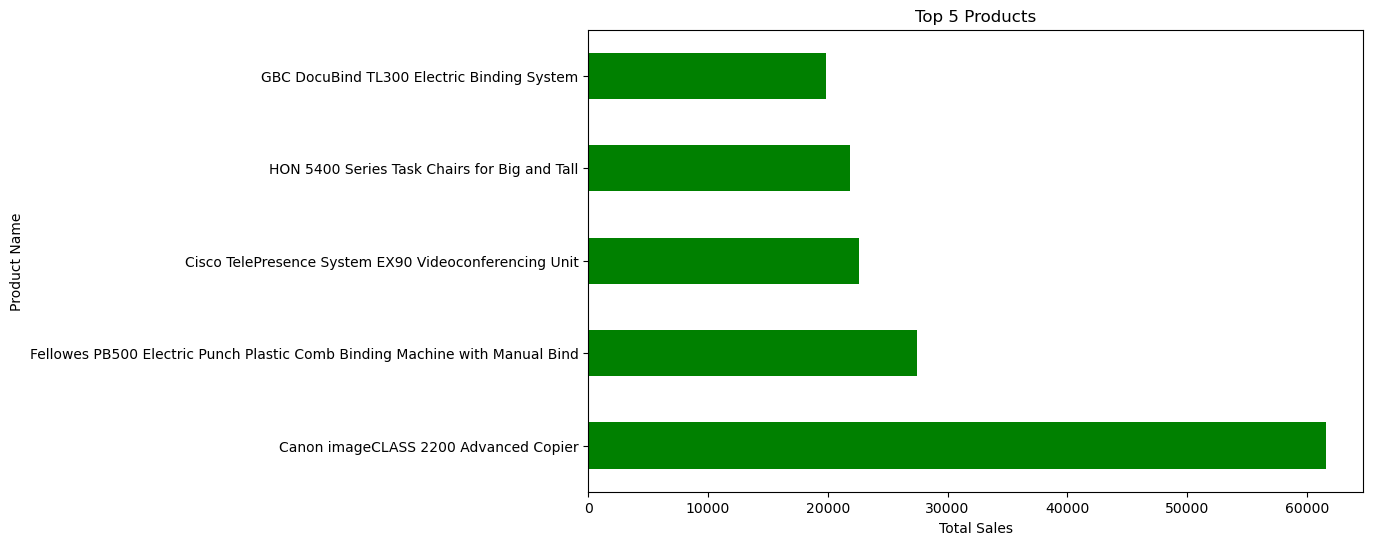

In [93]:
plt.figure(figsize=(10,6))
top_products.plot(kind='barh', color='green')   
plt.title("Top 5 Products")
plt.xlabel("Total Sales")   
plt.ylabel("Product Name")  
plt.show()

In [65]:
#Top 5 Customers

In [94]:
top_costumer = df.groupby('Customer Name')['Sales'].sum().nlargest(5)
print(top_costumer)

Customer Name
Sean Miller      25043.050
Tamara Chand     19052.218
Raymond Buch     15117.339
Tom Ashbrook     14595.620
Adrian Barton    14473.571
Name: Sales, dtype: float64


In [67]:
import plotly.graph_objs as go
from plotly.offline import iplot

# Create the bar trace
trace = go.Bar(
    x=top_costumer.index,                 # Customer names
    y=top_costumer.values,                # Total sales
    marker=dict(
        color='orange',
        line=dict(color='black', width=1)
    ),
    text=[f'{val:,.0f}' for val in top_costumer.values],  # Show value on top
    textposition='auto'  # Automatically place the labels on bars
)

# Layout
layout = go.Layout(
    title='Top 5 Customers',
    xaxis=dict(title='Customer Name'),
    yaxis=dict(title='Total Sales'),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    bargap=0.2
)

# Figure
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


In [100]:
profit_region = df.groupby('Region')['Profit'].sum()
print(profit_region)    

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64


In [121]:
import plotly.figure_factory as ff
from plotly.offline import iplot
import pandas as pd

# Example: calculate multiple metrics per region
profit_region = df.groupby('Region')['Profit'].sum()
sales_region = df.groupby('Region')['Sales'].sum()
orders_region = df.groupby('Region')['Order ID'].count()  # number of orders

# Combine into a DataFrame
region_summary = pd.DataFrame({
    'Region': profit_region.index,
    'Total Profit': profit_region.values,
    'Total Sales': sales_region.values,
    'Number of Orders': orders_region.values
})

# Create the table
colorscale = "RdBu"
table = ff.create_table(region_summary, colorscale=colorscale)

# Customize font size
for i in range(len(table.layout.annotations)):
    table.layout.annotations[i].font.size = 12  # adjust font size

# Display the table
iplot(table)
